##0. Import Dependencies and Pretrained Model

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [12]:
!ls

generated_2img.jpg  generated_img.jpg	     Neural_style.ipynb
generated_3img.jpg  IMG_20200201_142928.jpg
generated_4img.jpg  IMG_20200218_163328.jpg


In [11]:
#mount google drive for storage
from google.colab import drive
drive.mount('/content/drive')
os.chdir('MyDrive/test-images')
os.system('ls')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0

In [13]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

##1. Preprocess Image and Load

In [14]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [21]:
content_image = load_image('IMG_20200201_142928.jpg') #change the file name acording to images that you want to mainpulate
style_image = load_image('IMG_20200218_163328.jpg')

##2. Visualize Output

In [22]:
content_image.shape

TensorShape([1, 4144, 1968, 3])

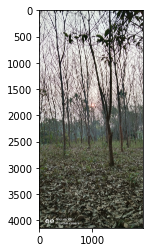

In [23]:
plt.imshow(np.squeeze(style_image))
plt.show()

##3. Stylize Image

In [24]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

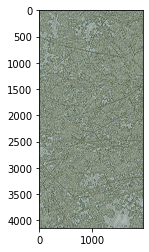

In [25]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [ ]:
cv2.imwrite('generated_5img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))